# Naive_Bayes Classification Tutorial
Generated: 2025-09-13T01:20:38

This notebook shows a complete, minimal workflow for **Naive_Bayes** on a synthetic binary classification dataset with 12 features.

**What you'll do:**
1. Load the dataset (`nb_data.csv`) with 12 feature columns (`f1..f12`) and a `target` (0/1).
2. Explore shapes and basic stats.
3. Train/validation split.
4. Preprocess (scaling where appropriate).
5. Train a Naive_Bayes classifier with reasonable defaults.
6. Evaluate with accuracy, precision, recall, F1, confusion matrix, ROC-AUC.
7. Save the fitted model (optional).


In [ ]:
# Setup
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay

import matplotlib.pyplot as plt

# Load data
data_path = "../datasets/nb_data.csv"
df = pd.read_csv(data_path)

print("Shape:", df.shape)
df.head()

Shape: (800, 13)


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,target
0,-0.101688,-1.214665,-0.083555,0.078906,-0.932742,-3.575772,2.539723,2.088892,0.685563,-0.550697,1.143114,-0.677925,0
1,1.249349,0.312470,-1.969932,0.453767,-1.760356,2.173386,-2.714885,-1.060532,-0.997961,4.499695,-0.933677,0.599670,1
2,0.600324,-0.438864,-3.802462,-0.792446,0.965917,1.388253,-3.475133,-0.089164,0.918202,1.663077,2.712566,-1.826818,1
3,-0.095528,-4.309413,-3.018990,0.682081,-1.317275,-4.537630,1.917956,-1.698571,0.142698,-0.212774,1.156912,-1.963681,1
4,1.702611,0.853879,1.089031,1.005598,-2.005895,0.651379,-1.731907,-1.092733,-0.269664,0.387344,-1.067816,0.590665,1


In [2]:
# Basic EDA
print(df.describe().T)
print("\nClass distribution:\n", df['target'].value_counts(normalize=True).rename('proportion'))

        count      mean       std       min       25%       50%       75%  \
f1      800.0  0.557943  1.793903 -3.852239 -0.578747  0.672312  1.832625   
f2      800.0  0.116505  1.953309 -6.338312 -1.276225  0.293961  1.551605   
f3      800.0 -0.355099  2.644170 -8.964776 -1.979203 -0.292100  1.352587   
f4      800.0  0.035440  0.992106 -2.848756 -0.629045  0.000758  0.705447   
f5      800.0 -0.569049  1.894901 -5.610444 -1.865898 -0.824924  0.475053   
f6      800.0 -0.028452  2.627492 -8.053673 -1.776114 -0.125293  1.757913   
f7      800.0 -0.674272  2.027364 -6.545181 -2.081778 -0.659074  0.792661   
f8      800.0 -0.488039  1.605387 -5.967789 -1.627344 -0.611736  0.778488   
f9      800.0 -0.056015  1.002891 -3.494597 -0.727811 -0.116042  0.626261   
f10     800.0  0.553977  2.026621 -5.021947 -0.834714  0.474265  1.875923   
f11     800.0  0.729387  1.803087 -4.981972 -0.408835  0.816264  1.949140   
f12     800.0  0.087006  2.108552 -6.532410 -1.301214  0.272353  1.599574   

In [3]:
# Train/Validation split
X = df.drop(columns=['target'])
y = df['target']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=123, stratify=y
)

X_train.shape, X_val.shape

((640, 12), (160, 12))

In [4]:
# Gaussian Naive Bayes (assumes features ~ Gaussian within each class)
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

# For ROC, some NB implementations provide predict_proba; GaussianNB does.
y_proba = clf.predict_proba(X_val)[:, 1]

Accuracy : 0.806
Precision: 0.789
Recall   : 0.778
F1-score : 0.783
ROC AUC  : 0.908

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82        88
           1       0.79      0.78      0.78        72

    accuracy                           0.81       160
   macro avg       0.80      0.80      0.80       160
weighted avg       0.81      0.81      0.81       160


Confusion Matrix:
 [[73 15]
 [16 56]]


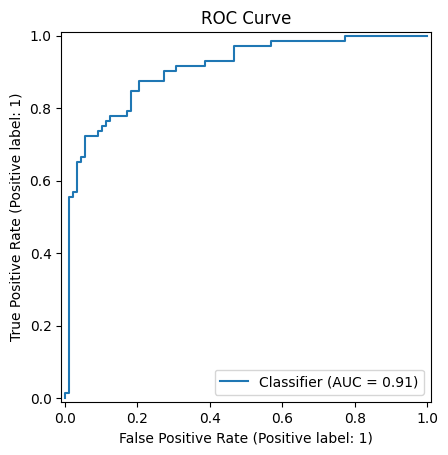

In [5]:
# Evaluation
acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred)
rec = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_proba)

print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-score : {f1:.3f}")
print(f"ROC AUC  : {auc:.3f}")

print("\nClassification Report:\n", classification_report(y_val, y_pred))

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)
print("\nConfusion Matrix:\n", cm)

# ROC Curve (uses matplotlib; no style or color specified)
RocCurveDisplay.from_predictions(y_val, y_proba)
plt.title("ROC Curve")
plt.show()

In [6]:
# (Optional) Save model with joblib for later reuse
# Uncomment to persist
# import joblib
# joblib.dump(clf if 'clf' in globals() else pipe, "model.joblib")
